In [2]:
# 从booksforcharlie/stable-diffusion-inpainting加载预训练重绘模型

from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "booksforcharlie/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:02,  2.48it/s]An error occurred while trying to fetch /home/nervld/.cache/huggingface/hub/models--booksforcharlie--stable-diffusion-inpainting/snapshots/d260cf3646fe94c6d5d70820b77512f836d7cce2/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/nervld/.cache/huggingface/hub/models--booksforcharlie--stable-diffusion-inpainting/snapshots/d260cf3646fe94c6d5d70820b77512f836d7cce2/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  86%|████████▌ | 6/7 [00:01<00:00,  3.39it/s]An error occurred while trying to fetch /home/nervld/.cache/huggingface/hub/models--booksforcharlie--stable-diffusion-inpainting/snapshots/d260cf3646fe94c6d5d70820b77512f836d7cce2/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/nervld/.cache/huggingface/hub/models--booksforcharlie--stable-diffusion-inpainting/sn

100%|██████████| 50/50 [00:05<00:00,  9.91it/s]


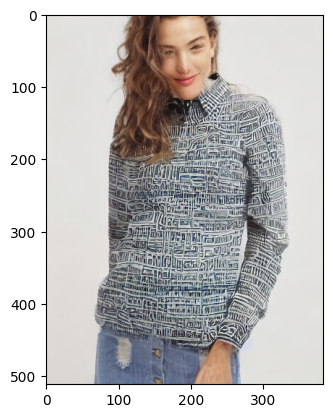

In [12]:
from PIL import Image
image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg")
mask_image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg")

prompt = ""
image = pipe("",image=image, mask_image=mask_image, width=384, height=512)[0][0]



from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:04<00:00, 10.81it/s]


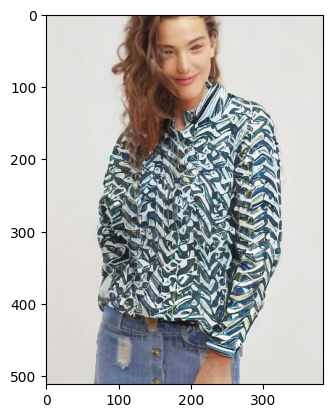

In [11]:
image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg")
mask_image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg")

from catvton_base_infer import prepare_masked_image_tensor

masked_image = prepare_masked_image_tensor(image, mask_image)

prompt = ""
image = pipe("",image=image, mask_image=mask_image, masked_image_latents=masked_image, width=384, height=512)[0][0]

from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

100%|██████████| 50/50 [00:04<00:00, 10.10it/s]


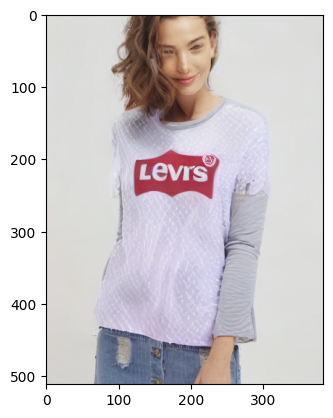

In [13]:
image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg")
mask_image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg")

cloth_warp_image = Image.open("/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_images/00000_00.jpg")
cloth_warp_mask = Image.open("/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_masks/00000_00.jpg")

from catvton_base_infer import prepare_warpped_masked_image_tensor

masked_image = prepare_warpped_masked_image_tensor(image, mask_image, cloth_warp_image, cloth_warp_mask)

prompt = ""
image = pipe("",image=image, mask_image=mask_image, masked_image_latents=masked_image, width=384, height=512)[0][0]

from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()